# Steam Games Review Analysis

Modified From: https://www.kaggle.com/code/danielbeltsazar/steam-games-reviews-analysis-sentiment-analysis

Treat this as the temporary training script.

TF-IDF + Random Forest Classifier. Two classes [positive, negative]

The ratings of a product are reflected in the comments or reviews. In the advanced sentiment analysis for the product rating system, comments are analyzed to detect the hidden sentiments. In this case, comments about gaming experience in steam platform will be analyzed.

Sentiment analysis using machine learning takes the help of a database comprising sentiment-based words that include both positive and negative keywords. 

The words used in the user comments section is compared to the words contained in the database and an evaluation is made. By comparing with the keywords in the database, the system specifies whether the product is good, bad, or worst.

# 1. Install and Import Necessary Libray For NLP and Sentiment Analysis

In [1]:
# %%capture
# !pip install stopwords
# !pip install flair
# !pip install nltk
# !pip install swifter

In [2]:
import pandas as pd
import numpy as np
# import flair
# from flair.data import Sentence
import re
import nltk
from nltk.corpus import stopwords
# from wordcloud import WordCloud
import matplotlib.pyplot as plt
import random as rn
import seaborn as sns
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter
from PIL import Image
pd.options.display.max_rows = None

In [3]:
from sklearn.datasets import  make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(10000, n_classes=5, n_informative=10, weights=[.04, .4, .12, .5, .04])
train, test, ytrain, ytest = train_test_split(X, y, test_size=.3, random_state=42)

In [4]:
ytest

array([2, 1, 3, ..., 1, 3, 3])

# 2. Import Steam Games Review Dataset


### Here i'm just taking 2% of our data to analyze and to be trained.

In [3]:
rn.seed(a=40)
p = 0.02

from pathlib import Path
dataset_path = Path('../dataset.csv').resolve()

review = pd.read_csv(dataset_path,skiprows=lambda i: i>0 and rn.random() > p)
review.head()

,app_id,app_name,review_text,review_score,review_votes
0,10,Counter-Strike,Graphics is not everything! :) Old school love.,1,1
1,10,Counter-Strike,Played it over 2000hours..woah.. all i can say...,1,0
2,10,Counter-Strike,Think you got skills because you came from CS:...,1,1
3,10,Counter-Strike,"Game of my childhood. It was the year 1998, i...",1,0
4,10,Counter-Strike,Where it all started :) A true classic to the ...,1,0


### Here i'm taking 10% of our data to be used as our model validation.

In [4]:
rn.seed(a=40)
q = 0.1  
review_val = pd.read_csv(dataset_path,skiprows=lambda i: i>0 and rn.random() > q)
review_val.head()

,app_id,app_name,review_text,review_score,review_votes
0,10,Counter-Strike,This game saved my virginity.,1,0
1,10,Counter-Strike,Fire in the Hole Simulator 1999,1,0
2,10,Counter-Strike,Best game ever! Started my gaming addiction :D,1,1
3,10,Counter-Strike,'Lock and Load.' 'Go go go!' 'Fire in the hole...,1,0
4,10,Counter-Strike,Nice oldschool game! Counter-Strike is very co...,1,1


In [5]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128153 entries, 0 to 128152
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   app_id        128153 non-null  int64 
 1   app_name      124366 non-null  object
 2   review_text   128004 non-null  object
 3   review_score  128153 non-null  int64 
 4   review_votes  128153 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 4.9+ MB


In [6]:
review.review_text = review.review_text.astype('str')

# 3. Analysis and Visualization


## 3.1. Distribution of Reviews in Each Sentiment

In [7]:
temp = review.groupby('review_score').count()['review_text'].reset_index().sort_values(by='review_text',ascending=False)
temp.style.background_gradient(cmap='Purples')


,review_score,review_text
1,1,104694
0,-1,23459


### We will see the visualization of it.

/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='review_score', ylabel='count'>

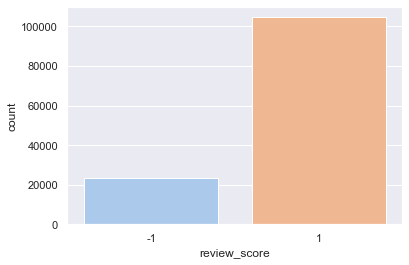

In [8]:
# sns.set_theme(style='whitegrid')
plt.style.use("dark_background")
sns.set(rc = {'figure.figsize':(13,8)})
sns.set_palette("pastel")
sns.countplot(x='review_score',data=review)

### We can see that there are more positive sentiment reviews than negative sentiment reviews.

## 3.4. Distribution of Number of Review Words

### First we create additional features to count number of words in each review text

In [9]:
review_vis = review.copy()

In [10]:
review_vis['Num_word_review'] = review_vis['review_text'].apply(lambda x:len(str(x).split()))

### Than we can plot them

/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Num_word_review', ylabel='Count'>

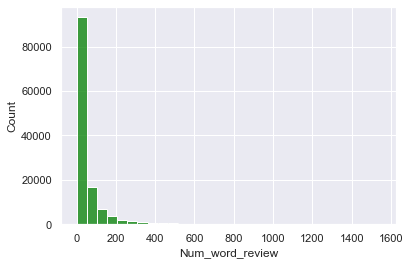

In [11]:
sns.histplot(data=review_vis, x="Num_word_review",bins=30,color='green')

### As we can see that most of our review texts contain 1-200 words.

## 3.5. Distribution of Words in All Review Texts

In [12]:
review_vis['temp_list'] = review_vis['review_text'].apply(lambda x:str(x).split())
top = Counter([item for sublist in review_vis['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,the,276424
1,and,186298
2,a,175388
3,to,174542
4,of,133863
5,is,123576
6,game,113869
7,I,112255
8,you,106759
9,it,85241


### Of course this list still contains stopwords which we have not filtered yet. We will see them later after we filter our review texts.

# 4. Data Cleaning For Sentiment Processing

In [13]:
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer
nltk.download('stopwords')
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/michaelcheng/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Null values Cleaning

In [14]:
review.isnull().sum()

app_id             0
app_name        3787
review_text        0
review_score       0
review_votes       0
dtype: int64

### But after we've seen that the missing values are only in app name feature, we will ignore them anyway.

Note: Data preprocessing is a creative process and has no single definite workflow to it.

But for NLP, usually involves stemming, lemmatizing, removing special characters, removing stopwords (which has little to none impact to the overall meaning of the sentence.), removing punctuation, lower casing words etc...

### Duplicate Values Removing

In [15]:
review = review.drop_duplicates(keep='first')

In [16]:
review.shape

(109075, 5)

### We make a function to clean some basic characters

In [17]:
def clean(raw):
    """ Remove hyperlinks and markup """
    result = re.sub("<[a][^>]*>(.+?)</[a]>", 'Link.', raw)
    result = re.sub('&gt;', "", result)
    result = re.sub('&#x27;', "'", result)
    result = re.sub('&quot;', '"', result)
    result = re.sub('&#x2F;', ' ', result)
    result = re.sub('<p>', ' ', result)
    result = re.sub('</i>', '', result)
    result = re.sub('&#62;', '', result)
    result = re.sub('<i>', ' ', result)
    result = re.sub("\n", '', result)
    return result

### We make function to remove numeric

In [18]:
def remove_num(texts):
   output = re.sub(r'\d+', '', texts)
   return output

### We make function to remove emoji

In [19]:
def deEmojify(x):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'', x)

### We make function to unify whitespaces

In [20]:
def unify_whitespaces(x):
    cleaned_string = re.sub(' +', ' ', x)
    return cleaned_string 

### We make function to remove symbols

In [21]:
def remove_symbols(x):
    cleaned_string = re.sub(r"[^a-zA-Z0-9?!.,]+", ' ', x)
    return cleaned_string

### We make function to remove punctuation

In [22]:
def remove_punctuation(text):
    final = "".join(u for u in text if u not in ("?", ".", ";", ":",  "!",'"',','))
    return final

### We make function to remove stopwords

Stopwords are words that occur frequently in a language and are often grammatical in nature, such as articles (e.g., "the," "a"), prepositions (e.g., "in," "on"), conjunctions (e.g., "and," "but"), and pronouns (e.g., "he," "she"). These words are necessary for constructing sentences and conveying grammatical structure, but they often do not contribute much to the overall meaning of the text.

- noise reduction
- Improved Analysis Accuracy
- faster processing

In [23]:
stop=set(stopwords.words("english"))
stemmer=PorterStemmer()
lemma=WordNetLemmatizer()

def remove_stopword(text):
   text=[word.lower() for word in text.split() if word.lower() not in stop]
   return " ".join(text)

### We make function to use stemming to normalize words

Reduce the words to its stem to reduce dimension.
e.g. 

cared ----> care

university ----> univers

fairly ----> fair

easily ----> easili

singing ----> sing

sings ----> sing

sung ----> sung

singer ----> singer

sportingly ----> sport

In [24]:
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
def stemming(text):
   stem=[]
   # stopword = stopwords.words('english')
   snowball_stemmer = SnowballStemmer('english')
   word_tokens = nltk.word_tokenize(text)
   stemmed_word = [snowball_stemmer.stem(word) for word in word_tokens]
   stem=' '.join(stemmed_word)
   return stem

### Then we combine all the cleaning functions

In [25]:
def cleaning(df,review):
    df[review] = df[review].apply(clean)
    df[review] = df[review].apply(deEmojify)
    df[review] = df[review].str.lower()
    df[review] = df[review].apply(remove_num)
    df[review] = df[review].apply(remove_symbols)
    df[review] = df[review].apply(remove_punctuation)
    df[review] = df[review].apply(remove_stopword)
    df[review] = df[review].apply(unify_whitespaces)
    df[review] = df[review].apply(stemming)

In [26]:
cleaning(review,'review_text')

In [27]:
review[['review_text']].head(20)

,review_text
0,graphic everyth old school love
1,play hourswoah say isthisi old gold let go eve...
2,think got skill came cs go think got skill cau...
3,game childhood year pentium pc month upgrad dx...
4,start true classic counter strike seri never g...
5,play game year year non steam still amaz fact ...
6,old still best
7,nice game
8,great
9,play awesom game grow oh ya boy miss


### Now all the cleanings are done. We will try to visualize the common words distribution of our review texts. We have done it before but our previous review texts still contain stopwords and punctuations.

In [28]:
review_vis2 = review.copy()

In [29]:
review_vis2['temp_list'] = review_vis2['review_text'].apply(lambda x:str(x).split())
top = Counter([item for sublist in review_vis2['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,game,189136
1,play,55324
2,like,39450
3,get,33243
4,one,27061
5,good,26695
6,time,25745
7,fun,24913
8,realli,21775
9,great,21689


### We can plot them

/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='count', ylabel='Common_words'>

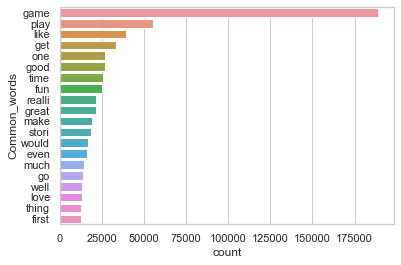

In [30]:
sns.set_theme(style="whitegrid")
sns.barplot(x="count", y="Common_words", data=temp)

### Then We can see that the word "game" , "play" , "like" are the top 3 common words in our review texts.

# 5. Creating Bag of Words and Text Classifier Model

## 5.1. Creating pipeline for tokenizing and modelling

### Here i use count vectorizer for tokenizing and random forest as classifier model.

can use other models, such as Adaboost, XGBoost, logistric

The author uses TF-IDF -> Random Forest classifier to build the sentiment classification.

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.ensemble import RandomForestClassifier
clf = Pipeline([
    ('vect', CountVectorizer(stop_words= "english",max_features=4000)),
    ('tfidf', TfidfTransformer()),
    ('classifier', RandomForestClassifier()),
    ])

In [32]:
X = review['review_text']
y = review['review_score']

In [33]:
from collections import Counter
Counter(y)

Counter({1: 89326, -1: 19749})

## 5.2. Tokenizing and Model Training

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 40,
                                                   test_size = 0.20)


In [35]:
text_classifier = clf.fit(X_train,y_train)

In [36]:
predictions = text_classifier.predict(X_test)

In [37]:
np.unique(predictions)

array([-1,  1])

## 5.3. Model's Performance

In [38]:
# find accuracy, precision, recall:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score
confusion_matrix(y_test,predictions)

array([[ 1225,  2726],
       [  432, 17432]])

In [39]:
def Confusion_Matrix(y_test,ypred):
    cfmat = confusion_matrix(y_test,ypred)
    print('Confusion Matrix: \n',classification_report(y_test,ypred,labels=[1,-1]))
    print("\n")
    print('TN - True Negative {}'.format(cfmat[1,1]))
    print('FP - False Positive {}'.format(cfmat[1,0]))
    print('FN - False Negative {}'.format(cfmat[0,1]))
    print('TP - True Positive {}'.format(cfmat[0,0]))
    print('Accuracy Rate: {}'.format(np.divide(np.sum([cfmat[0,0],cfmat[1,1]]),np.sum(cfmat))))
    print('Misclassification Rate: {}'.format(np.divide(np.sum([cfmat[0,1],cfmat[1,0]]),np.sum(cfmat))))
    print('F1-Score: {}'.format(f1_score(y_test, ypred,average='macro')))
    print('ROC-AUC {}'.format(roc_auc_score(y_test,ypred)))

In [40]:
Confusion_Matrix(y_test,predictions)

Confusion Matrix: 
               precision    recall  f1-score   support

           1       0.86      0.98      0.92     17864
          -1       0.74      0.31      0.44      3951

    accuracy                           0.86     21815
   macro avg       0.80      0.64      0.68     21815
weighted avg       0.84      0.86      0.83     21815



TN - True Negative 17432
FP - False Positive 432
FN - False Negative 2726
TP - True Positive 1225
Accuracy Rate: 0.8552372220948888
Misclassification Rate: 0.14476277790511116
F1-Score: 0.6769093570799276
ROC-AUC 0.6429326876267415


<Axes: >

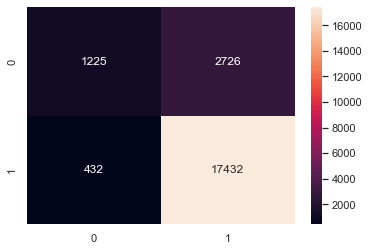

In [41]:
sns.heatmap(confusion_matrix(y_test,predictions),annot=True,fmt='')

We see from above confusion matrix that our model has accuracy of 85.6 % and F1-Score of 0.678. It is not good because our data is highly imbalanced. Our model has high accuracy because it computes accuracy of prediction on majority class. After putting our attention to F1-Score, we can understand that our data is poorly at predicting negative class. 

We also have ROC-AUC score of 0.64. So there is a high chance that the our text classifier model WILL NOT be able to distinguish the positive sentiment class values from the negative sentiment class values.

## 5.4. Model's performance validation for larger original dataset

### Here we use our validation data which was taken from 10% of our steam review dataset.

In [42]:
review_val.review_text = review_val.review_text.astype('str')
#cleaning(review_val,'review_text')

In [43]:
X_val = review_val['review_text']
y_val = review_val['review_score']

In [44]:
y_pred = text_classifier.predict(X_val)

In [45]:
Confusion_Matrix(y_val,y_pred)

Confusion Matrix: 
               precision    recall  f1-score   support

           1       0.84      0.98      0.91    524658
          -1       0.68      0.17      0.27    116329

    accuracy                           0.83    640987
   macro avg       0.76      0.57      0.59    640987
weighted avg       0.81      0.83      0.79    640987



TN - True Negative 515709
FP - False Positive 8949
FN - False Negative 96908
TP - True Positive 19421
Accuracy Rate: 0.8348531249463718
Misclassification Rate: 0.16514687505362824
F1-Score: 0.5876767909551035
ROC-AUC 0.5749460432739436


<Axes: >

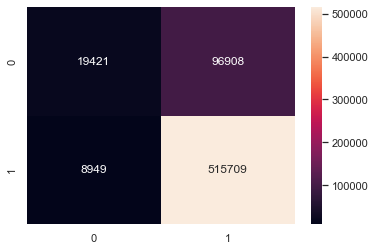

In [46]:
sns.heatmap(confusion_matrix(y_val,y_pred),annot=True,fmt='')

Same as before, we see from above confusion matrix that our model has accuracy of 83.4% and F1-Score of 0.58. It is not good because our data is highly imbalanced and shows that our text classifier model performed poorly on larger data. 

We also have __ROC-AUC score of 0.57__. So there is a __high chance__ that the our text classifier model will __not be able to distinguish the positive sentiment class values from the negative sentiment class values on larger data.__

## 5.5. Imbalanced Data Classes Handling

### We will use oversampling and undersampling method to handle our imbalanced data.

In [47]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as PL

### Then we set our sampling strategy and variables needed in pipeline

In [86]:
strategy1 = {-1:40000}
strategy2 = {1:40000}

# max_features: If not None, build a vocabulary that only consider the top max_features ordered by term frequency across the corpus.
# Otherwise, all features are used.
vect = CountVectorizer(stop_words= "english",max_features=3000)
tfidf = TfidfTransformer()
over = SMOTE(sampling_strategy=strategy1)
under = RandomUnderSampler(sampling_strategy=strategy2)
model = RandomForestClassifier()

In [107]:
# create the dataset

X = review['review_text'].values
y = review['review_score'].values

In [108]:
Counter(y)

Counter({1: 89326, -1: 19749})

Step

- build a CountVectorizer() to count the number of words (term frequency). (and limit your vocabulary size, apply stop words and etc. have to read the docs)  
That is the line _vect.fit(X)_ deos.

- then compute the IDF values by calling tfidf_transformer.fit(word_count_vector) on the word counts we computed earlier.  
That's the line _X = trf.transform(X)_ does

The aformentioned two steps can be combined with _fit_transform()_ function.

fit(): allow the "vector counter" (or other model) to learn the distribution/characteristics of some dataset, return the learnt parameters.

transform(): pass in the original dataset, then apply the "vector counter" (or other model) to the dataset, return the result of applying that model

In [135]:
# trf = vect.fit(X)
# X = trf.transform(X)
X_vectorized = vect.fit_transform(X)

In [110]:
X_vectorized.shape

(109075, 3000)

Then we re-sample the dataset.

The vectorizer is separated from the pipeline object as the fit_resample() only takes the vectorized vectors value as input. String input is not accepted. That's why it's separated

In [111]:
steps = [('over', over), ('under', under)]
pipeline = PL(steps=steps)

In [121]:
X_new, y_new = pipeline.fit_resample(X_vectorized, y)

In [113]:
counter_new = Counter(y_new)
print("Tweet Sentiment Class Proportion after oversampling and undersampling: \n",counter_new)

Tweet Sentiment Class Proportion after oversampling and undersampling: 
 Counter({-1: 40000, 1: 40000})


In [114]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_new, y_new,random_state = 40,
                                                   test_size = 0.20)

We prepare our original data (before oversampling and undersampling) as our evaluation data.

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 40,
                                                   test_size = 0.20)

In [116]:
Counter(y)

Counter({1: 89326, -1: 19749})

### Then we run our pipeline and train the model

skip the vectorizer as it has been fit with the unbalanced dataset (which it should). The vectorizer is supposed to learn the distribution/frequency of words in the general dataset, but not the re-balanced dataset, which is a distorted distribution of the general dataset.

In [122]:
pipeline_train = Pipeline([
    # ('vect', vect),
    ('tfidf', tfidf),
    ('model', model),
    ])

In [123]:
text_classifier2 = pipeline_train.fit(X_train2,y_train2)

### Evaluation on original data

Include the learnt vectorizer. Input will be the cleaned sentence. Output will be the prediction.

In [124]:
pipeline_test = Pipeline([
    ('vect', vect),
    ('tfidf', tfidf),
    ('model', model),
])

In [125]:
predictions2 = pipeline_test.predict(X_test)

In [126]:
Confusion_Matrix(y_test,predictions2)

Confusion Matrix: 
               precision    recall  f1-score   support

           1       0.98      0.88      0.93     17864
          -1       0.63      0.94      0.75      3951

    accuracy                           0.89     21815
   macro avg       0.81      0.91      0.84     21815
weighted avg       0.92      0.89      0.90     21815



TN - True Negative 15684
FP - False Positive 2180
FN - False Negative 250
TP - True Positive 3701
Accuracy Rate: 0.8886087554435022
Misclassification Rate: 0.11139124455649782
F1-Score: 0.8404750491733518
ROC-AUC 0.9073458702513765


<Axes: >

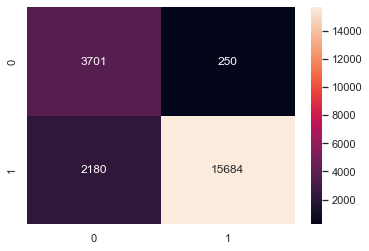

In [127]:
sns.heatmap(confusion_matrix(y_test,predictions2),annot=True,fmt='')

Now we got better model after training it on oversampling and undersampling data. We got model with accuracy of 88.7% and F1-Score of 0.83.

We also have ROC-AUC score of 0.9. So there is a high chance that the our text classifier model WILL be able to distinguish the positive sentiment class values from the negative sentiment class values on larger data.

----------

Model saving

https://stackoverflow.com/questions/58020251/how-to-save-classifier-in-sklearn-with-countvectorizer-and-tfidftransformer

In [128]:
# save the model and "trained" tfidf transformer
# so that we can reuse the existing cluster/frequency of the training dataset

from datetime import datetime
import pickle


# we save the RandomForestClassifier() in section 5.5
filename = Path('steam-games-reviews-analysis-sentiment-analysis_model_{}.sav'.format(datetime.today().strftime("%d-%m-%Y")))
pickle.dump(model, open(filename, 'wb'))

# we save the count vectorizer in section 5.5 also
filename_count_vec = Path('steam-games-reviews-analysis-sentiment-analysis_count_vectorizer_{}.pkl'.format(datetime.today().strftime("%d-%m-%Y")))
pickle.dump(vect, open(filename_count_vec, "wb"))

# we save the fit tfidf (fit in pipeline2.fit())
filename_tfidf = Path('steam-games-reviews-analysis-sentiment-analysis_tfidf_{}.pkl'.format(datetime.today().strftime("%d-%m-%Y")))
pickle.dump(tfidf, open(filename_tfidf, "wb"))

Self testing the model. Building a demo pipeline.

Input: a sentence
Output: a sentiment score.



In [129]:
# load the model

import pickle
from pathlib import Path

filename = Path("steam-games-reviews-analysis-sentiment-analysis_model_12-09-2023.sav")
loaded_model = pickle.load(open(filename, 'rb'))

# we save the count vectorizer in section 5.5 also
filename_count_vec = Path('steam-games-reviews-analysis-sentiment-analysis_count_vectorizer_12-09-2023.pkl')
loaded_count_vec = pickle.load(open(filename_count_vec, "rb"))

# we save the fit tfidf (fit in pipeline2.fit())
filename_tfidf = Path('steam-games-reviews-analysis-sentiment-analysis_tfidf_12-09-2023.pkl')
loaded_tfidf = pickle.load(open(filename_tfidf, "rb"))


re-build the end-to-end pipeline

from data-cleaning to output

In [130]:
from sklearn.pipeline import Pipeline

def cleaning(s_list:list[str]):
    '''Apply text cleaning to a list of texts before passing to the model
    '''
    _s_list = list(map(clean, s_list))
    _s_list = list(map(deEmojify, _s_list))
    _s_list = list(map(lambda x: x.lower(), _s_list))
    _s_list = list(map(remove_num, _s_list))
    _s_list = list(map(remove_symbols, _s_list))
    _s_list = list(map(remove_punctuation, _s_list))
    _s_list = list(map(remove_stopword, _s_list))
    _s_list = list(map(unify_whitespaces, _s_list))
    _s_list = list(map(stemming, _s_list))
    return _s_list

pipeline_loaded = Pipeline([
    ('count_vectorizer', loaded_count_vec),
    ('tfidf', loaded_tfidf),
    ('model', loaded_model)    
])

In [131]:
X_test

array(['game realli awesom best shooter game',
       'go one hole come anoth hole', 'earli access review', ...,
       'cool even write cuz im busi playingw',
       'get mood pinbal game best one exist never feel like play graphic accuraci real life machin unbeliev amaz game',
       'realli fun game even though graphic good jeez game like graphic obvious count gameplay matter excel'],
      dtype=object)

In [132]:
predictions_from_loaded = pipeline_loaded.predict(X_test)

In [133]:
Confusion_Matrix(y_test,predictions_from_loaded)

Confusion Matrix: 
               precision    recall  f1-score   support

           1       0.98      0.88      0.93     17864
          -1       0.63      0.94      0.75      3951

    accuracy                           0.89     21815
   macro avg       0.81      0.91      0.84     21815
weighted avg       0.92      0.89      0.90     21815



TN - True Negative 15684
FP - False Positive 2180
FN - False Negative 250
TP - True Positive 3701
Accuracy Rate: 0.8886087554435022
Misclassification Rate: 0.11139124455649782
F1-Score: 0.8404750491733518
ROC-AUC 0.9073458702513765


<Axes: >

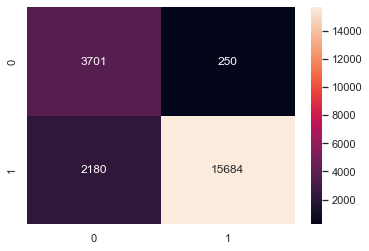

In [134]:
sns.heatmap(confusion_matrix(y_test,predictions2),annot=True,fmt='')

The result matches with the previous testing pipeline.

In [142]:
pipeline_loaded.predict(['This game is freaking good! I enjoy the graphics.'])

array([-1])

In [144]:
pipeline_loaded.predict(['GOAT !!'])

array([1])